<a href="https://colab.research.google.com/github/Noman-494/my_new/blob/main/Decison_Tree_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns

In [3]:
df=sns.load_dataset("iris")

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
# prompt: Using dataframe df: label encoder species column

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to the species column and transform it
df['species'] = le.fit_transform(df['species'])


In [13]:
df["species"].value_counts()

,count
species,
0,50
1,50
2,50


In [10]:
# prompt: Using dataframe df: value count species

# Calculate the value counts for the 'species' column
df['species'].value_counts()


,count
species,
setosa,50
versicolor,50
virginica,50


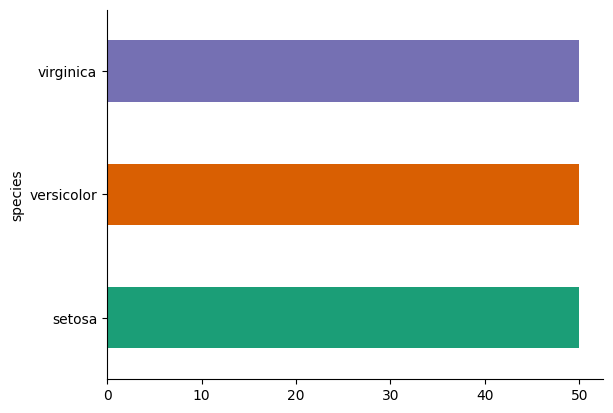

In [7]:
# @title species

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('species').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [14]:
df.head()
#

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


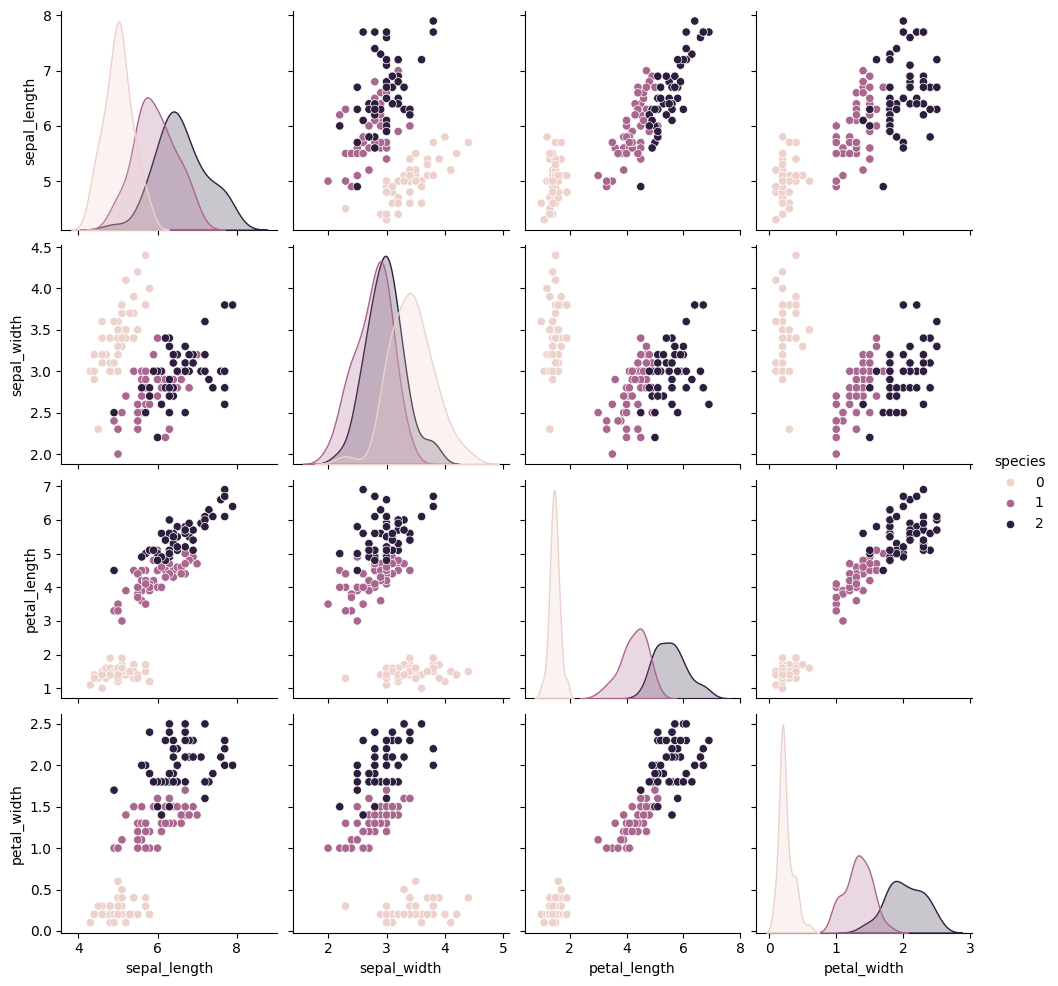

In [15]:
sns.pairplot(df, hue='species')

<Axes: xlabel='species', ylabel='sepal_length'>

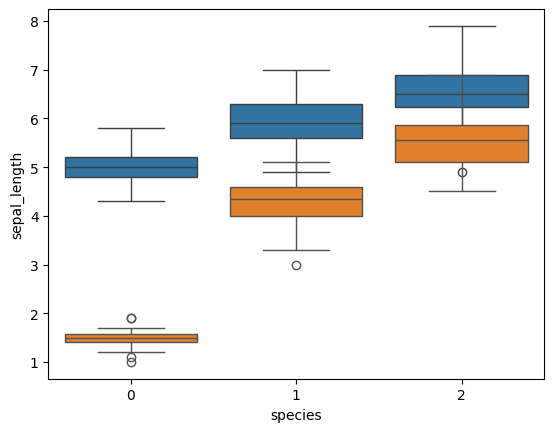

In [16]:
sns.boxplot(x='species', y='sepal_length', data=df)
sns.boxplot(x='species', y='petal_length', data=df)


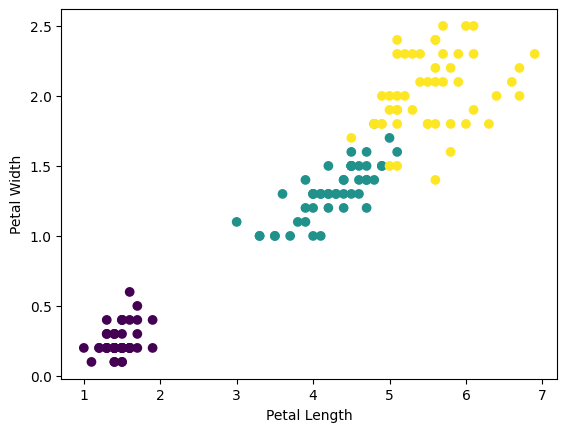

In [17]:
plt.scatter(df['petal_length'], df['petal_width'], c=df['species'])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()


In [18]:
X=df.drop(columns=["species"])
y=df["species"]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
model=DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [23]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,recall_score,precision_score
accuracy_score(y_test, y_pred)

1.0

<Axes: >

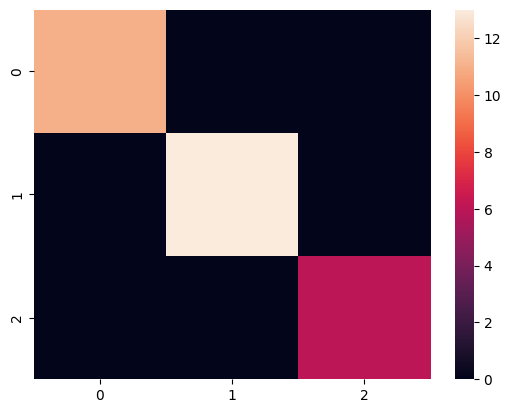

In [26]:
sns.heatmap(confusion_matrix(y_test, y_pred))

In [30]:
from sklearn.tree import plot_tree # import the plot_tree function

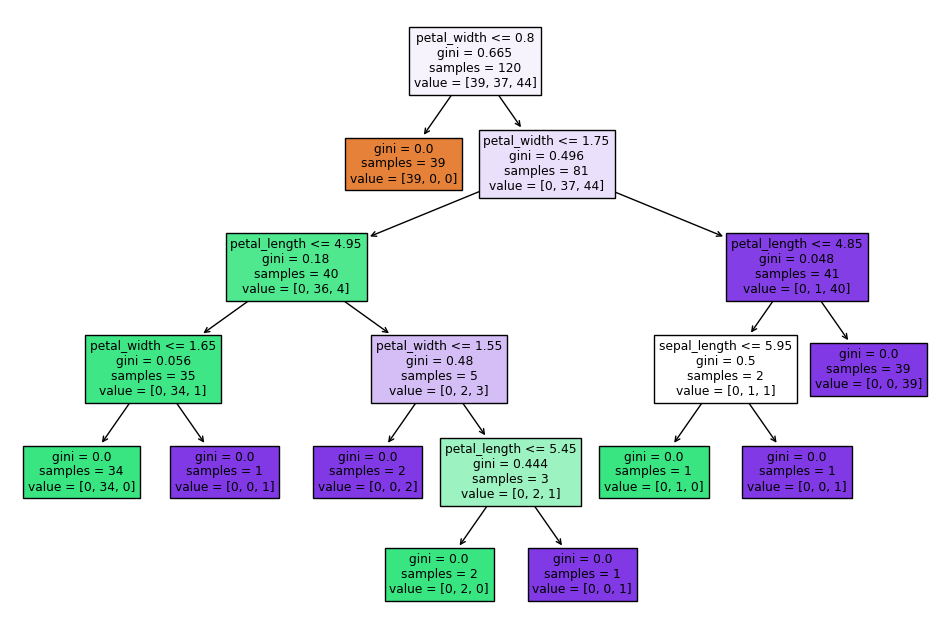

In [31]:
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns)
plt.show()




In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest,chi2

In [33]:
cross_val_score(model, X_train, y_train, cv=5).mean()

0.9333333333333333

In [37]:
select = SelectKBest(chi2,k=2)
select.fit(X_train, y_train)
selected_features = X_train.columns[select.get_support()]

In [38]:
selected_features

Index(['petal_length', 'petal_width'], dtype='object')

In [40]:
parameters={
    'criterion':['gini','entropy'],"max_depth":[1,2,3,4,5,6,7,8,9,10,11,12,None],"min_samples_split":[2,3,4,5,6,7,8,None],"min_samples_leaf":[1,2,3,4,5,6,7,8,None]
}

In [42]:
gird_search=GridSearchCV(estimator=model,param_grid=parameters,scoring='accuracy',cv=3,n_jobs=-1)
gird_search=gird_search.fit(X_train,y_train)
best_accuracy=gird_search.best_score_
best_parameters=gird_search.best_params_
print(best_accuracy)
print(best_parameters)

0.9499999999999998
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1248 fits failed out of a total of 5616.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
624 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ut

In [43]:
gird_search.best_estimator_

DecisionTreeClassifier(max_depth=3)

In [44]:
gird_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [45]:
gird_search.best_score_

0.9499999999999998

In [46]:
gird_search.best_index_

144

In [47]:
gird_search.cv_results_

{'mean_fit_time': array([0.0067238 , 0.00562318, 0.00520293, ..., 0.00095518, 0.00084503,
        0.0005494 ]),
 'std_fit_time': array([1.57277658e-03, 9.70173397e-04, 1.09499253e-03, ...,
        1.61543127e-05, 1.97818788e-04, 8.45032342e-06]),
 'mean_score_time': array([0.00364113, 0.00372012, 0.0041434 , ..., 0.        , 0.        ,
        0.        ]),
 'std_score_time': array([0.00035394, 0.00055098, 0.00037614, ..., 0.        , 0.        ,
        0.        ]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[1, 1, 1, ..., None, None, None],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[1, 1, 1, ..., None, None, None],
             